# **Describe**

Describe and visualizes dataset statistics

### **Setps**

1. [Data exploration](#Data-exploration)
2. [Importing the function](#Importing-the-function)
3. [Setup describe parameters](#Setup-describe-parameters)
4. [Running the function remotely](#Running-the-function-remotely)
5. [Some plots](#Some-plots)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Following packages are required, make sure to install
# !pip install scikit-learn

### **Data exploration**

We will use boston hose prices dataset from sklearn

In [1]:
from sklearn.datasets import load_boston

# Getting the data description from sklearn (data is preset too)
boston_dataset = load_boston()
print(boston_dataset["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
# We will get the data from a url source (describe function requires a path)
import pandas as pd

boston_data_path = 'https://s3.wasabisys.com/iguazio/data/function-marketplace-data/describe/sklearn_boston.csv'
boston_df = pd.read_csv(boston_data_path)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### **Importing the function**

In [3]:
import mlrun
mlrun.set_environment(project = "function-marketplace")

fn = mlrun.import_function("hub://describe")
fn.apply(mlrun.auto_mount())

> 2021-10-17 06:02:40,818 [info] loaded project function-marketplace from MLRun DB


### **Setup describe parameters**

In [4]:
describe_task = mlrun.new_task(name = 'describe_boston',
                               params = {'key' : 'summary',
                                         'plot_hist' : False,
                                         'label_column' : 'TARGET'})

### **Running the function remotely**

In [5]:
describe_run = fn.run(describe_task,
                      local=False,
                      inputs = {"table" : boston_data_path}      
                      )

> 2021-10-17 06:02:41,194 [info] starting run describe_boston uid=e4ffeb3f326a4b7b8586d401161ef3af DB=http://mlrun-api:8080
> 2021-10-17 06:02:41,331 [info] Job is running in the background, pod: describe-boston-tvbq9
> 2021-10-17 06:04:09,103 [info] run executed, status=completed
final state: completed


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
function-marketplace,...161ef3af,0,Oct 17 06:02:47,completed,describe_boston,v3io_user=danikind=jobowner=danihost=describe-boston-tvbq9,table,key=summaryplot_hist=Falselabel_column=TARGET,,histogramsviolinimbalanceimbalance-weights-veccorrelation-matrixcorrelation


> 2021-10-17 06:04:11,167 [info] run executed, status=completed


### **Some plots**


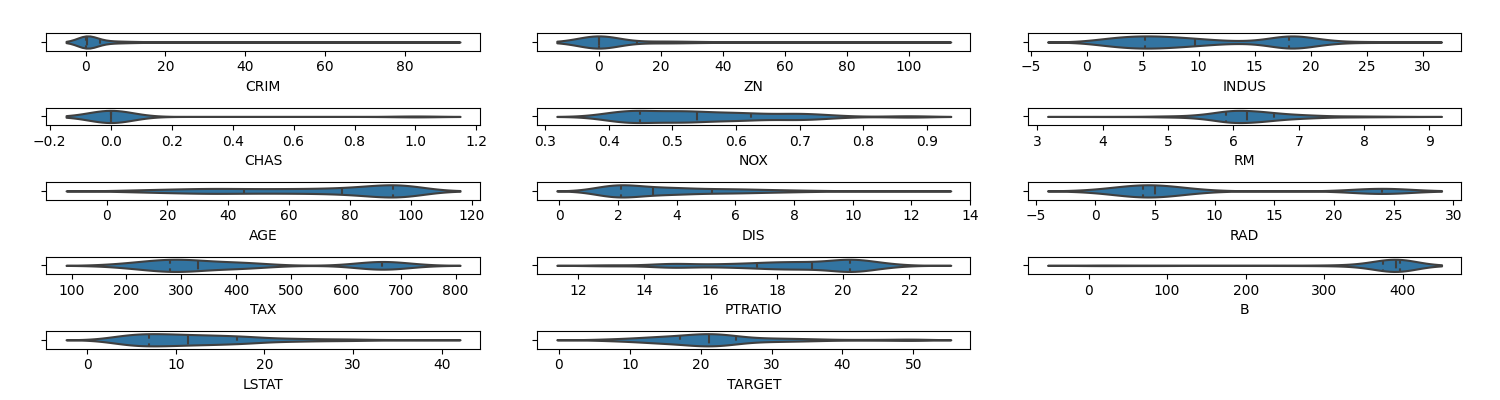

In [6]:
describe_run.artifact('violin').show()


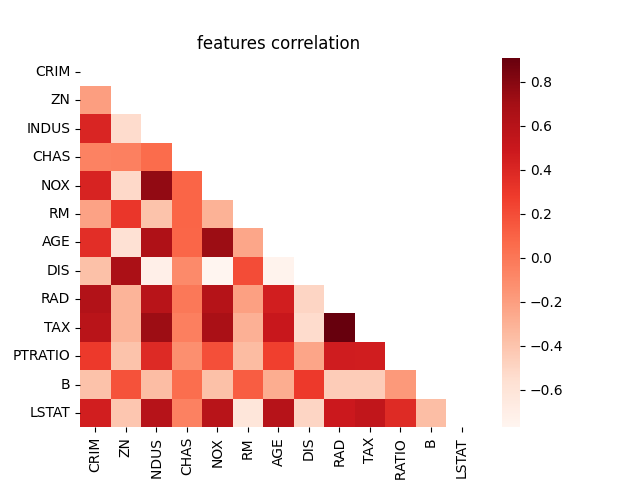

In [7]:
describe_run.artifact('correlation').show()


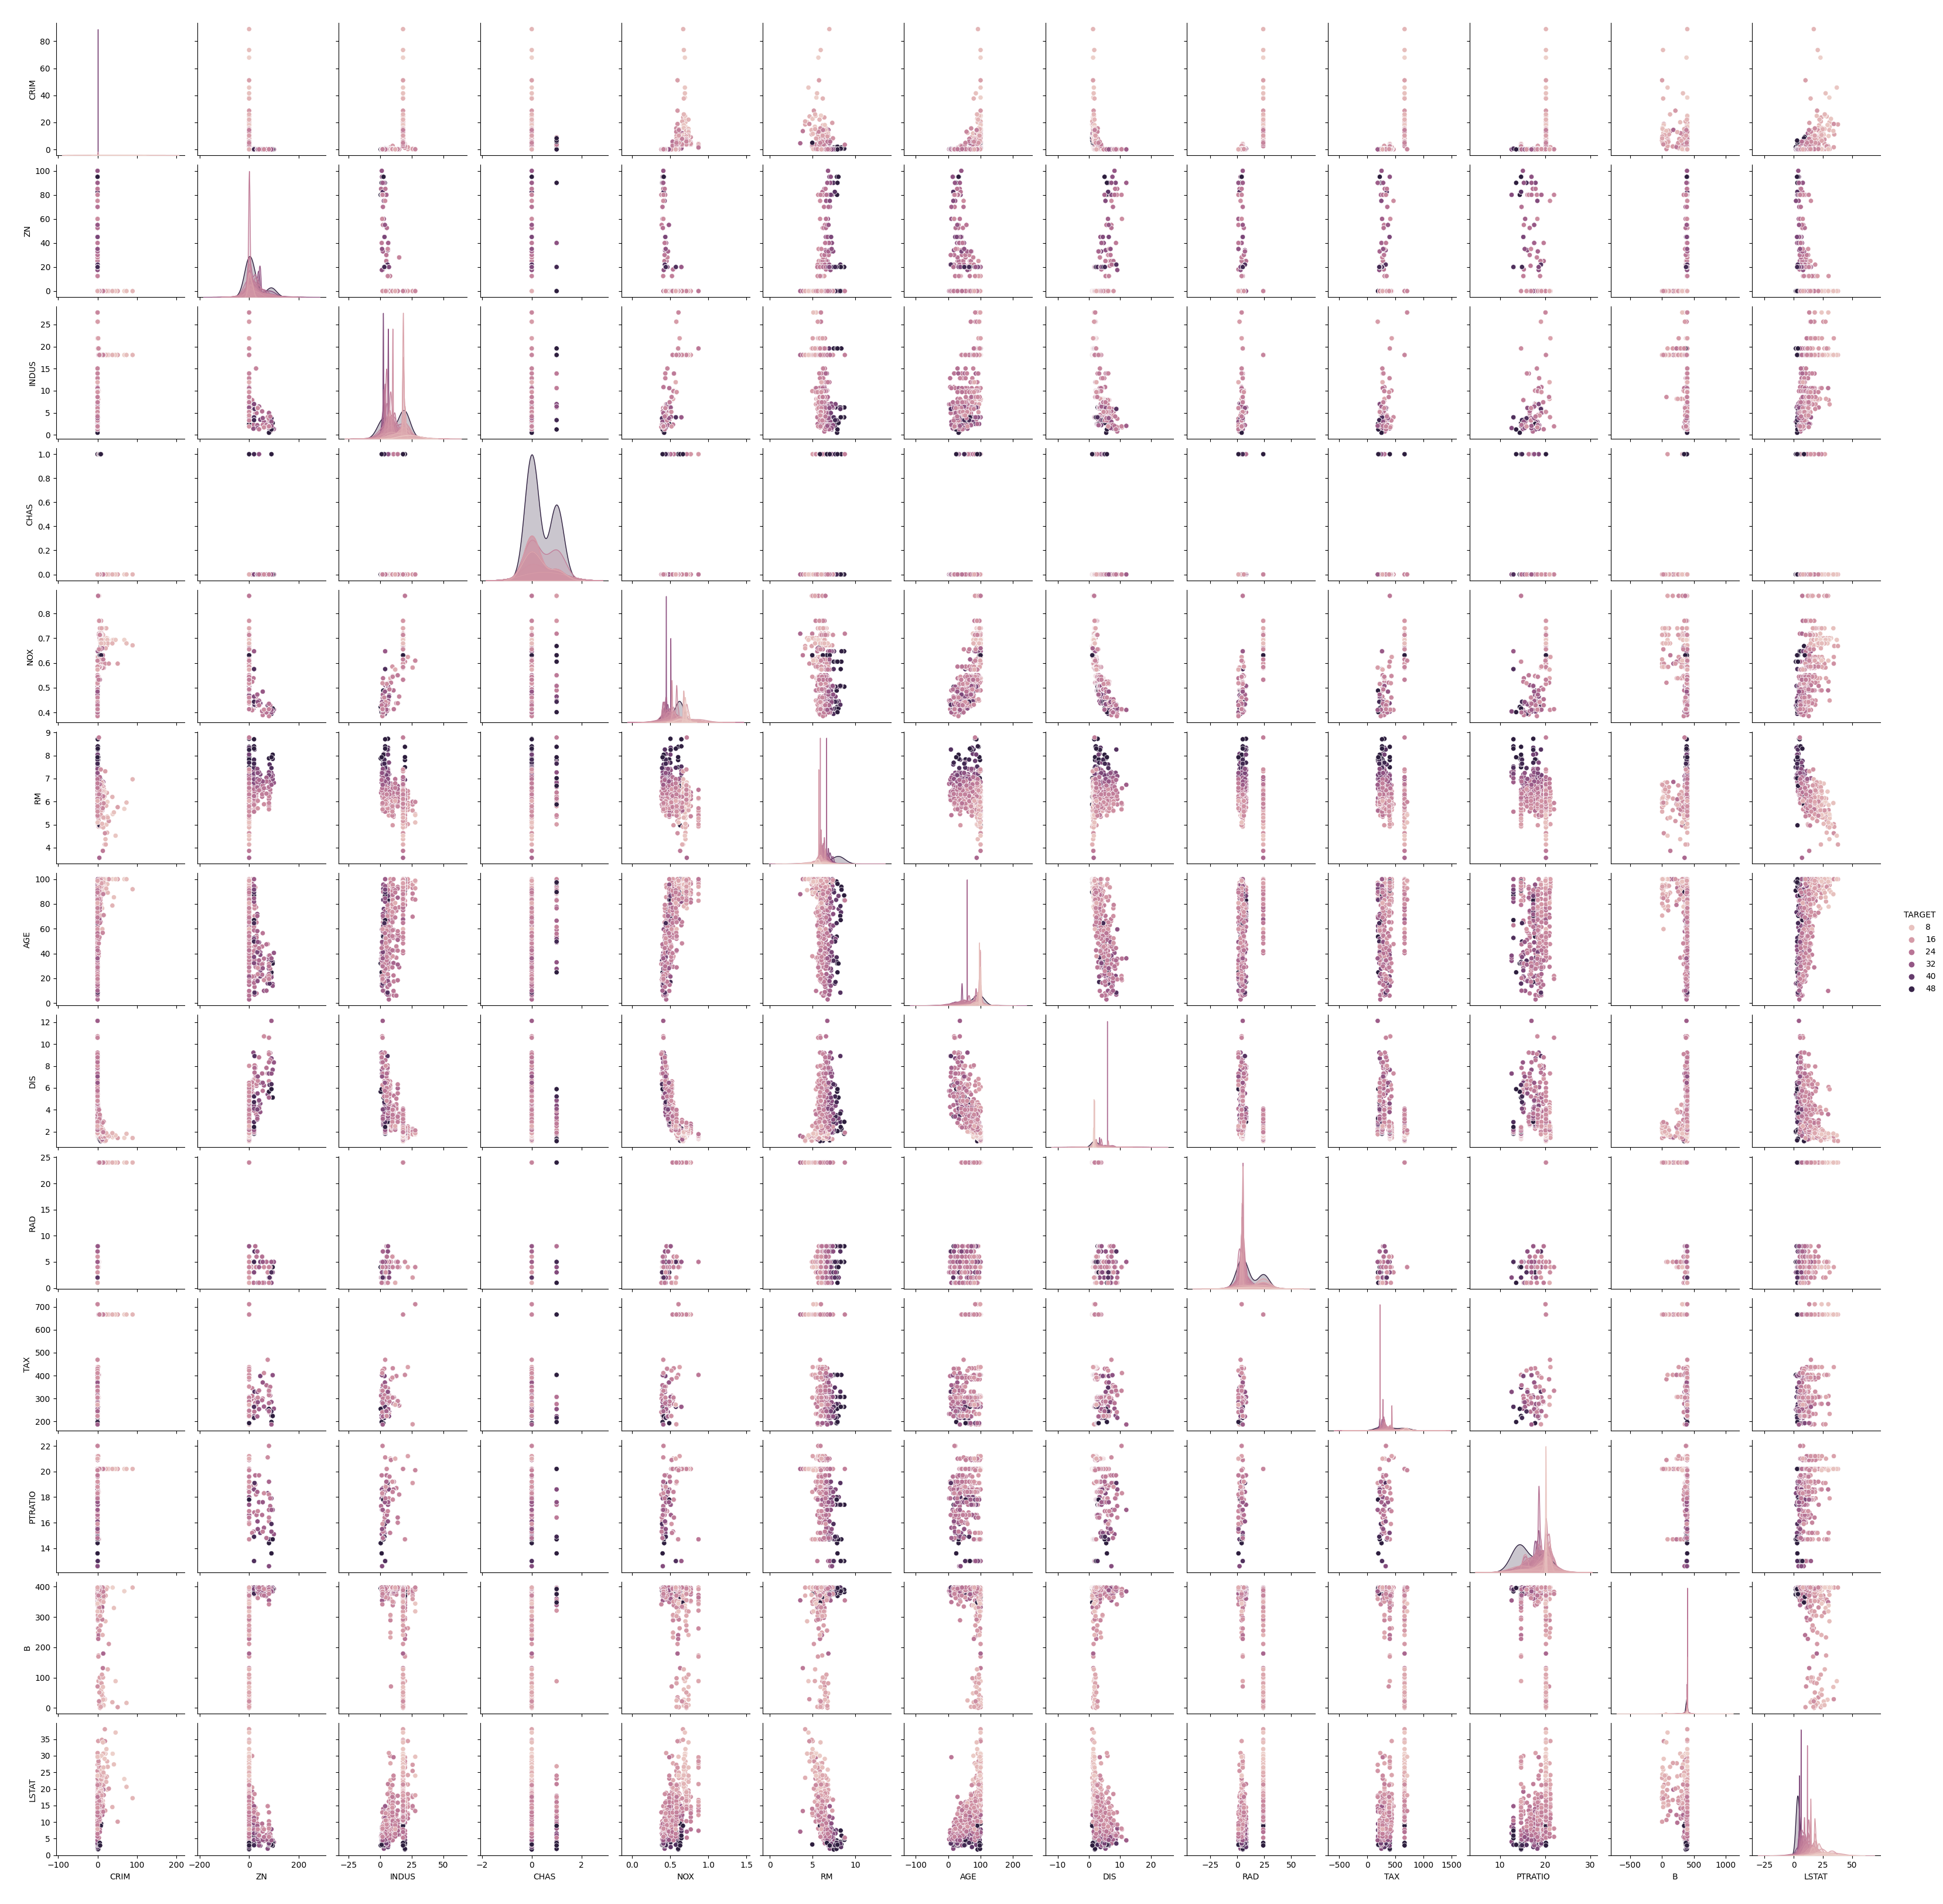

In [8]:
describe_run.artifact('histograms').show()

[Back to the top](#Describe)